In [2]:
library(tidyverse)
library(lubridate)
library(forcats)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# Lecture 14: Factors

In this lecture we will use the [General Social Survey](https://gss.norc.org) to study various social indicators in the U.S. The book covers an example extract of this dataset called `gss_cat`. However, it is not up to date; in particular it does not include any data from people who were born after the year 2000 (i.e. almost everyone in this room except the professor). So to make it more relevant, we are going to load a more recent version of the data.

In [3]:
load(url('https://datasets.stats306.org/gss18.RData'))

This command has loaded two tables into your workspace: `gss18.raw` contains the raw data, and `gss18.doc` contains 
information about what each column in `gss18.raw` represents:

In [3]:
gss18.raw %>% print

# A tibble: 2,348 × 14
     age  race   sex relig relpast sexbirth sexnow yearsusa unhappy  educ income
   <int> <int> <int> <int>   <int>    <int>  <int>    <int>   <int> <int>  <int>
 1    43     1     1    11       5       NA     NA       NA      NA    14     NA
 2    74     1     2     2      NA        1      1       NA       1    10     12
 3    42     1     1     4       3        2      2       NA      NA    16     12
 4    63     1     2     1      NA        1      1       NA       2    16     NA
 5    71     2     1     2      NA        2      2       NA       1    18     NA
 6    67     1     2     2       4       NA     NA       NA      NA    16     NA
 7    59     2     2     1      NA       NA     NA       NA       2    13     10
 8    43     1     1     2      NA        2      2       NA       2    12     12
 9    62     1     2     4       4        1      1       NA      NA     8      5
10    55     1     1     1      NA        2      2       NA       4    12     12
# … w

## Factors
Except for `age` and `tvhours`, each of the columns in `gss18.raw` is a categorical random variable. (Recall that a random variable is *categorical* if it takes on one of a (small) number of discrete values.) In R we represent categorical variables using *factors*.

To learn the basics, we'll start with a simple example, before returning to the `gss` data:

In [4]:
birth_months = c("Jan", "Feb", "Sep", "Sep", "Dec", "Jan", "Jul", "Aug")  # categorical variable

In [6]:
sort(birth_months)

[1] "Aug" "Dec" "Feb" "Jan" "Jan" "Jul" "Sep" "Sep"

The *possible* values of a categorical variable are called the *levels*. The levels of `birth_months` are `Jan`, `Feb`, ..., `Dec`. The *actual* values of `birth_months` are just called the values.

*Factors* are the traditional way to represent categorical data in R. To create a factor, we must specify the levels and the values:

In [7]:
month.abb

[1] "Jan" "Feb" "Mar" "Apr" "May" "Jun" "Jul" "Aug" "Sep" "Oct" "Nov" "Dec"

In [8]:
birth_months_fac = factor(birth_months, levels=month.abb) %>% print

[1] Jan Feb Sep Sep Dec Jan Jul Aug
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec


In [9]:
sort(birth_months_fac)

[1] Jan Jan Feb Jul Aug Sep Sep Dec
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

If you don't specify the levels, R will infer them based on all the observed values of the variable:

In [10]:
factor(birth_months) %>% str

 Factor w/ 6 levels "Aug","Dec","Feb",..: 4 3 6 6 2 4 5 1


It's best to be explicit about the factor levels. This way, if you there are typos or data entry errors, you will catch them more easily:

In [11]:
bad = c("Jan", "Feb", "Sep", "Ser", "Dec", "Jan", "Jul", "Aug")
#                               ^ note typo
# factor(bad)
factor(bad, levels=month.abb)

[1] Jan  Feb  Sep  <NA> Dec  Jan  Jul  Aug 
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

### Order
One advantage of factors is that they can be ordered. This enables them to sort and plot in the way you would expect. Compare:

In [ ]:
sort(birth_months)

[1] "Aug" "Dec" "Feb" "Jan" "Jan" "Jul" "Sep" "Sep"

In [ ]:
sort(birth_months_fac)

[1] Jan Jan Feb Jul Aug Sep Sep Dec
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

If you specify the factor levels using the `levels=` option, then that will specify the default order. If you do *not* specify the levels, then they will be sorted alphabetically by default:

In [12]:
levels(birth_months_fac)

[1] "Jan" "Feb" "Mar" "Apr" "May" "Jun" "Jul" "Aug" "Sep" "Oct" "Nov" "Dec"

In [13]:
levels(factor(birth_months))

[1] "Aug" "Dec" "Feb" "Jan" "Jul" "Sep"

Now, back to `gss18`. Let's focus on the [`race`](https://gssdataexplorer.norc.org/variables/82/vshow) column:

In [14]:
gss18.raw %>% select(race) %>% print

# A tibble: 2,348 × 1
    race
   <int>
 1     1
 2     1
 3     1
 4     1
 5     2
 6     1
 7     2
 8     1
 9     1
10     1
# … with 2,338 more rows


These data have been encoded for us into numbers. To get the coding scheme, we can consult the accompanying `gss18.doc` table:

In [17]:
gss18.doc %>% head(3)

id,description,properties,marginals,text
<chr>,<chr>,<list>,<list>,<chr>
age,Age of respondent,"Data type , Missing-data codes, Record/columns , numeric , 0,98,99 , 1/233-234 , AGE , AGE , AGE","Total Cases: , 64,814 (Range of valid codes: 18-89), AGE",13. Respondent's age
sex,Respondents sex,"Data type , Missing-data code, Record/column , numeric , 0 , 1/297 , SEX , SEX , SEX","44.1 , 55.9 , 100 , 28,614, 36,200, 64,814, 1 , 2 , NA , MALE , FEMALE, Total , SEX , SEX , SEX",23. Code respondent's sex
race,Race of respondent,"Data type , Missing-data code, Record/column , numeric , 0 , 1/298 , RACE , RACE , RACE","80.3 , 14.2 , 5.5 , 100 , 52,033, 9,187 , 3,594 , 64,814, 1 , 2 , 3 , NA , WHITE , BLACK , OTHER , Total , RACE , RACE , RACE , RACE",24. What race do you consider yourself?


In [4]:
# pull up data on race column
gss18.doc %>% filter(id == "race") %>% 
  select(marginals) %>% 
    unnest(cols=c(marginals))

percent,n,value,label,id
<dbl>,<chr>,<chr>,<chr>,<chr>
80.3,"52,033",1,WHITE,RACE
14.2,"9,187",2,BLACK,RACE
5.5,"3,594",3,OTHER,RACE
100.0,"64,814",NA,Total,RACE


Let's convert race in `gss18.raw` from an integer into a factor:

In [22]:
# convert race to factor
gss18.raw %>% 
  mutate(race = factor(race, labels=c('white', 'black', 'other'))) %>% 
    head

age,race,sex,relig,relpast,sexbirth,sexnow,yearsusa,unhappy,educ,income,phone,tvhours,partyid
<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
43,white,1,11,5,NA,NA,NA,NA,14,NA,6,3,5
74,white,2,2,NA,1,1,NA,1,10,12,3,NA,2
42,white,1,4,3,2,2,NA,NA,16,12,3,1,4
63,white,2,1,NA,1,1,NA,2,16,NA,3,1,2
71,black,1,2,NA,2,2,NA,1,18,NA,3,NA,6
67,white,2,2,4,NA,NA,NA,NA,16,NA,3,10,2


In [23]:
gss18 %>% head

age,race,sex,relig,relpast,sexbirth,sexnow,yearsusa,unhappy,educ,income,phone,tvhours,partyid
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
43,white,male,christian,strongly disagree,NA,NA,NA,NA,14,NA,cellphone,3,not str republican
74,white,female,catholic,NA,female,women,NA,never,10,$25000 or more,phone in home,NA,"ind,near dem"
42,white,male,none,neither agree nor disagree,male,man,NA,NA,16,$25000 or more,phone in home,1,"ind,near rep"
63,white,female,protestant,NA,female,women,NA,rarely,16,NA,phone in home,1,"ind,near dem"
71,black,male,catholic,NA,male,man,NA,never,18,NA,phone in home,NA,strong republican
67,white,female,catholic,disagree,NA,NA,NA,NA,16,NA,phone in home,10,"ind,near dem"


Notice that the order mattered -- R matched `white` with `1`, `black` with `2`, etc. If we had 
specified `labels=c("black", "white", "other")` it would have given us an incorrect factor.

## 🤔 Quiz

What percent of people in `gss18` identified as 'other' when asked their race?

<ol style="list-style-type: upper-alpha;">
    <li>0-10%</li>
    <li>10-20%</li>
    <li>20-30%</li>
    <li>More than 30%</li>
</ol>


In [27]:
# other
gss18 %>% select(race) %>% table %>% prop.table

race
    white     black     other 
0.7210392 0.1639693 0.1149915 

Now let's do this for all the other categorical variables in `gss18.raw`...

Just kidding! I did the work for you, and stored it in the table `gss18`:

In [ ]:
print(gss18)

# A tibble: 2,348 × 13
     age race  sex    relig  relpast sexbi…¹ sexnow years…² unhappy educ  income
   <int> <fct> <fct>  <fct>  <fct>   <fct>   <fct>  <fct>   <fct>   <fct> <fct> 
 1    43 white male   chris… strong… NA      NA     NA      NA      14    NA    
 2    74 white female catho… NA      female  women  NA      never   10    $2500…
 3    42 white male   none   neithe… male    man    NA      NA      16    $2500…
 4    63 white female prote… NA      female  women  NA      rarely  16    NA    
 5    71 black male   catho… NA      male    man    NA      never   18    NA    
 6    67 white female catho… disagr… NA      NA     NA      NA      16    NA    
 7    59 black female prote… NA      NA      NA     NA      rarely  13    $1500…
 8    43 white male   catho… NA      male    man    NA      rarely  12    $2500…
 9    62 white female none   disagr… female  women  NA      NA      8     $5000…
10    55 white male   prote… NA      male    man    NA      often   12    $2500…
# … w

### The `forcats` package
`tidyverse` contains a package that has some tools for working with factors. Sometimes it is not automatically loaded by the `tidyverse` metapackage, in which case you must load it manually:

In [ ]:
library(forcats) 

`forcats` commands are prefixed by `fct_` (compare `stringr`).

## Generations
Here are the ages of everybody in the dataset:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 7 rows containing non-finite values (`stat_bin()`).”


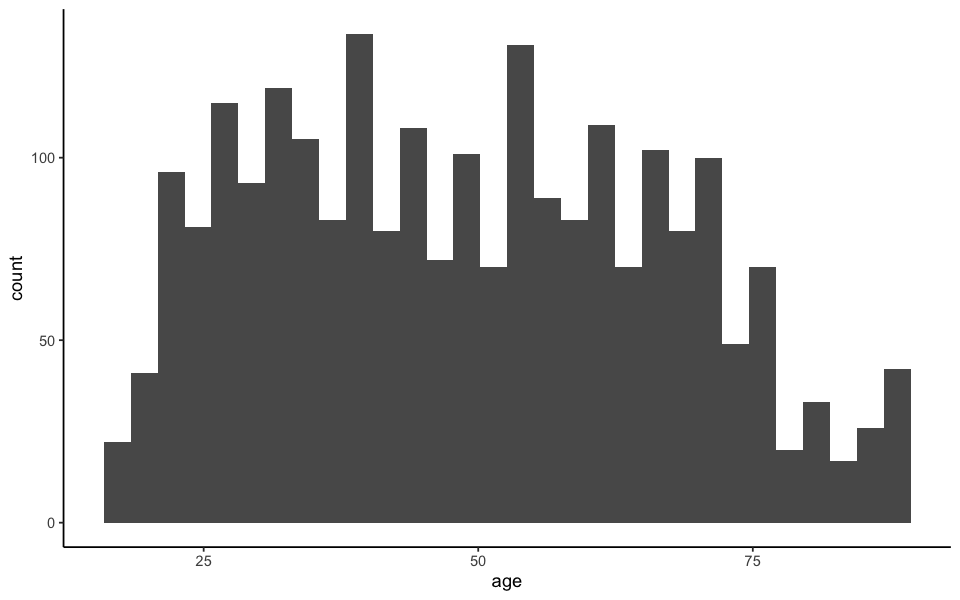

In [ ]:
ggplot(gss18) + geom_histogram(aes(x=age)) 

## 🤔 Quiz

In what year was the oldest person in this dataset born?

<ol style="list-style-type: upper-alpha;">
    <li>1910-1919</li>
    <li>1920-1929</li>
    <li>1930-1939</li>
    <li>1940-1949</li>
</ol>


In [28]:
# oldest person
gss18 %>% arrange(-age) %>% head

age,race,sex,relig,relpast,sexbirth,sexnow,yearsusa,unhappy,educ,income,phone,tvhours,partyid
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
89,white,male,catholic,NA,NA,NA,NA,never,8,$25000 or more,phone in home,NA,strong republican
89,white,female,catholic,NA,NA,NA,NA,sometimes,8,$25000 or more,phone in home,2,independent
89,white,female,catholic,NA,female,women,NA,never,12,NA,refused,NA,not str republican
89,white,male,protestant,NA,male,man,NA,sometimes,12,$25000 or more,phone in home,6,"ind,near rep"
89,white,male,catholic,NA,NA,NA,69,NA,5,NA,phone in home,7,strong democrat
89,white,female,protestant,NA,NA,NA,93,rarely,12,NA,phone in home,NA,not str democrat


Let's define the following generations
- [Silent generation](https://en.wikipedia.org/wiki/Silent_Generation): 1929&mdash;1945
- [Baby boomers](https://en.wikipedia.org/wiki/Baby_boomers): 1946&mdash;1964
- [Gen X](https://en.wikipedia.org/wiki/Generation_X): 1964&mdash;1981
- [Gen Y/Millennial](https://en.wikipedia.org/wiki/Millennials): 1982&mdash;1996
- [Gen Z](https://en.wikipedia.org/wiki/Generation_Z): 1997&mdash;20teens

In [9]:
# create a generations column in gss18
gss18 <- mutate(gss18, birth_year = 2018 - age,
    generation = cut(birth_year, breaks = c(1929, 1946, 1964, 1982, 1997, 2020),
        labels = c('silent', 'boomer', 'x', 'millennial', 'z')))

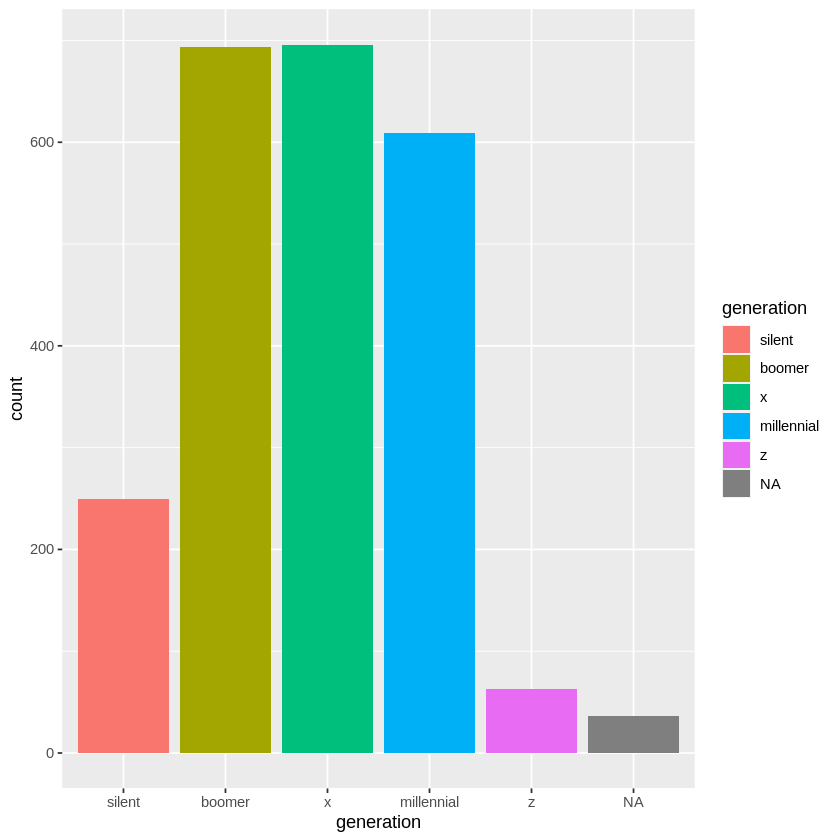

In [30]:
ggplot(gss18) + geom_bar(aes(x=generation, fill=generation))

## Attitudes about religion
Here is the overall distribution of religious affiliation in the data:

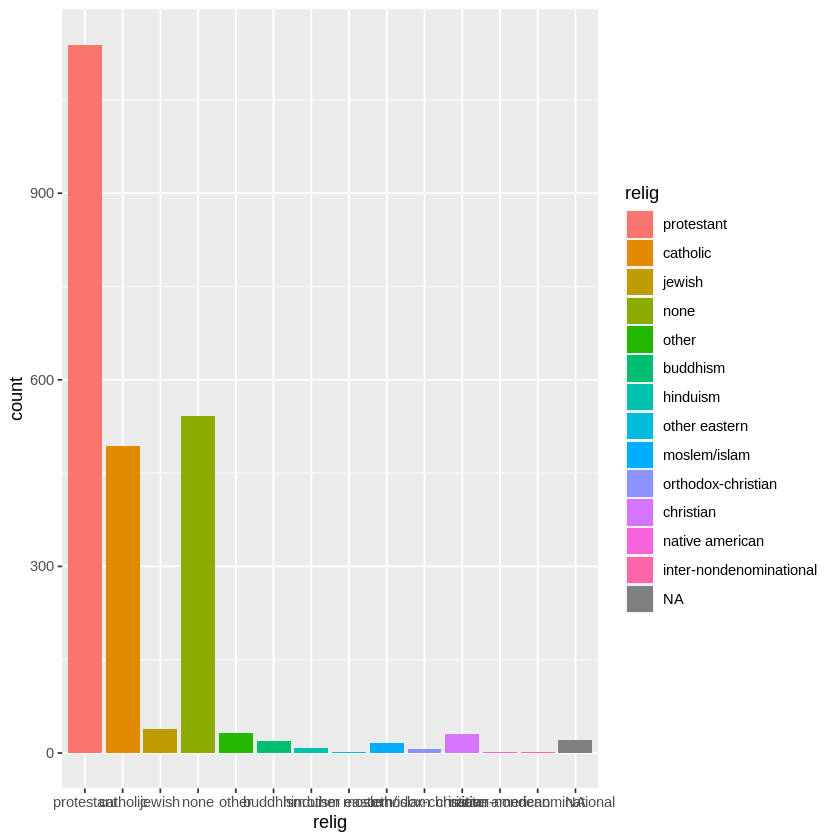

In [31]:
gss18 %>% ggplot(aes(x=relig, fill=relig)) +
  geom_bar()

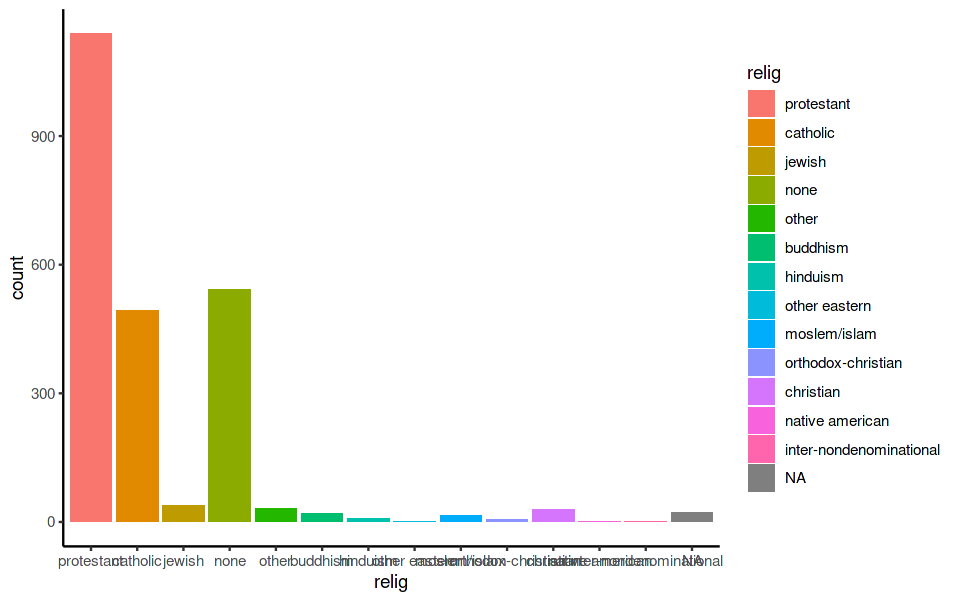

In [ ]:
# distribution of religion
gss18 %>% ggplot(aes(x=relig, fill=relig)) +
  geom_bar()

Let's think of ways to improve this jumbled plot. First, we can turn it sideways for better readability:

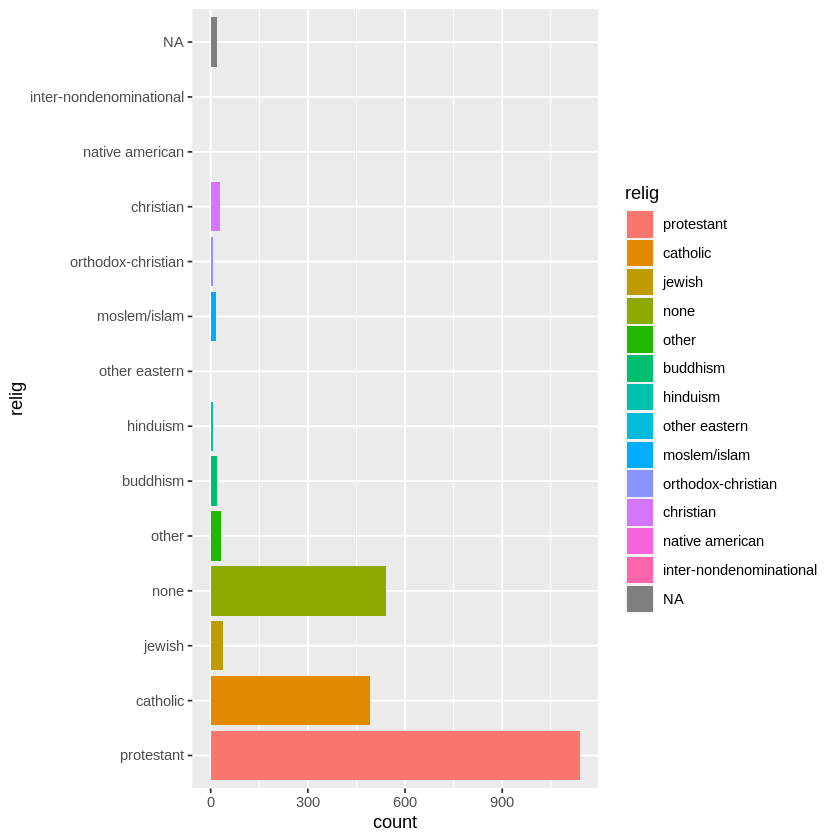

In [32]:
gss18 %>% ggplot(aes(y=relig, fill=relig)) +
  geom_bar()

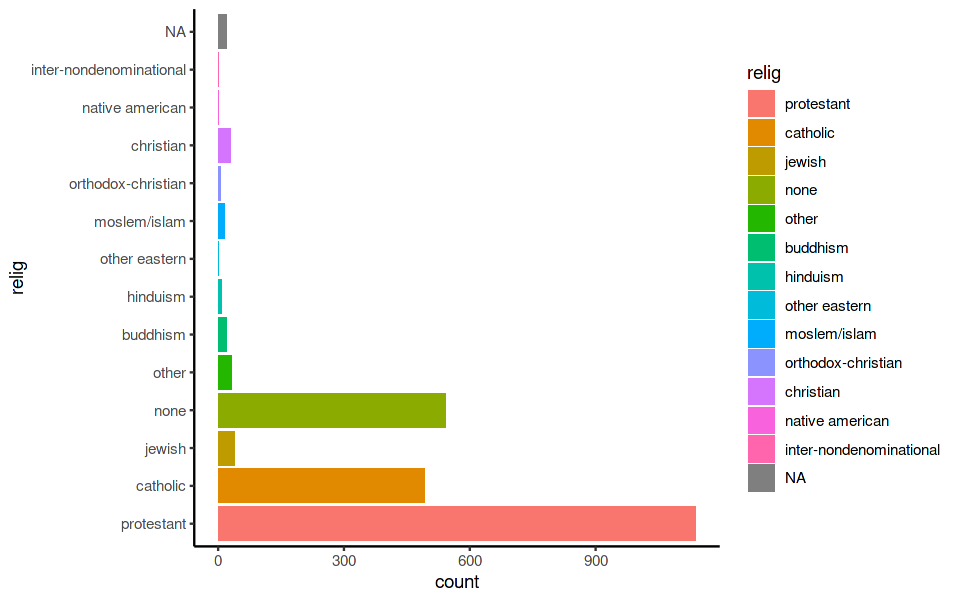

In [ ]:
# distribution of religion 

By default, the order of the labels shown by R corresponds to the order of the factor levels:

In [34]:
# levels of gss18$relig
levels(gss18$relig)

[1] "protestant"              "catholic"               
 [3] "jewish"                  "none"                   
 [5] "other"                   "buddhism"               
 [7] "hinduism"                "other eastern"          
 [9] "moslem/islam"            "orthodox-christian"     
[11] "christian"               "native american"        
[13] "inter-nondenominational"

In [35]:
gss18$relig %>% unique

[1] christian               catholic                none                   
 [4] protestant              moslem/islam            orthodox-christian     
 [7] buddhism                jewish                  other                  
[10] hinduism                <NA>                    inter-nondenominational
[13] other eastern           native american        
13 Levels: protestant catholic jewish none other buddhism ... inter-nondenominational

To improve the appearance of the plot, we can use `fct_infreq` to reorder the levels such in increasing order of frequency:

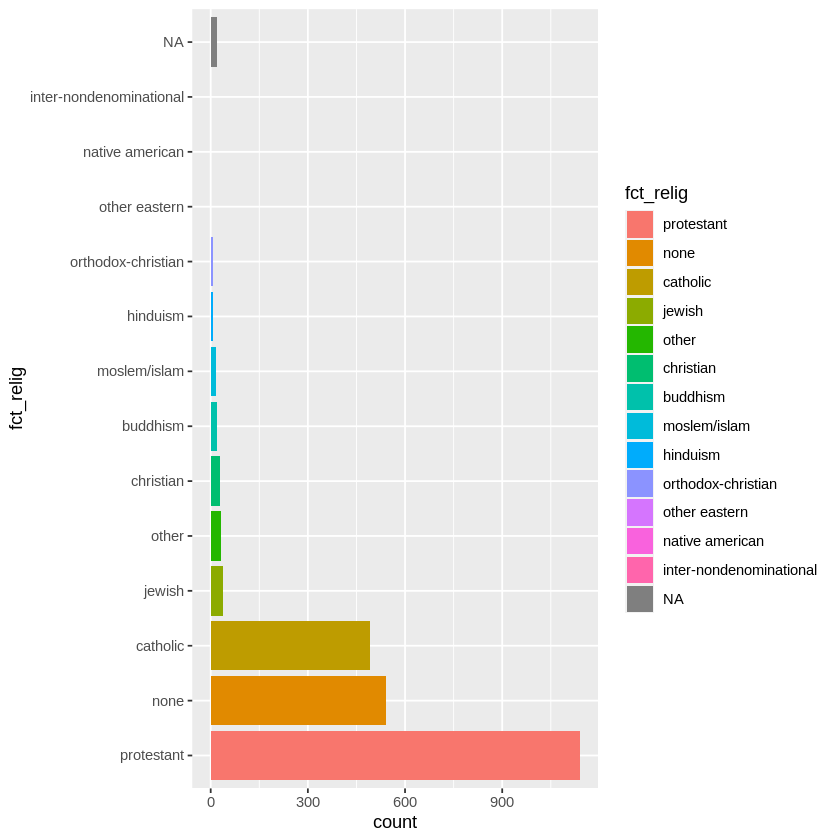

In [5]:
# sort the levels by their frequency

gss18 %>% mutate (fct_relig = fct_infreq(relig)) %>%
  ggplot(aes(y=fct_relig, fill=fct_relig)) +
  geom_bar()

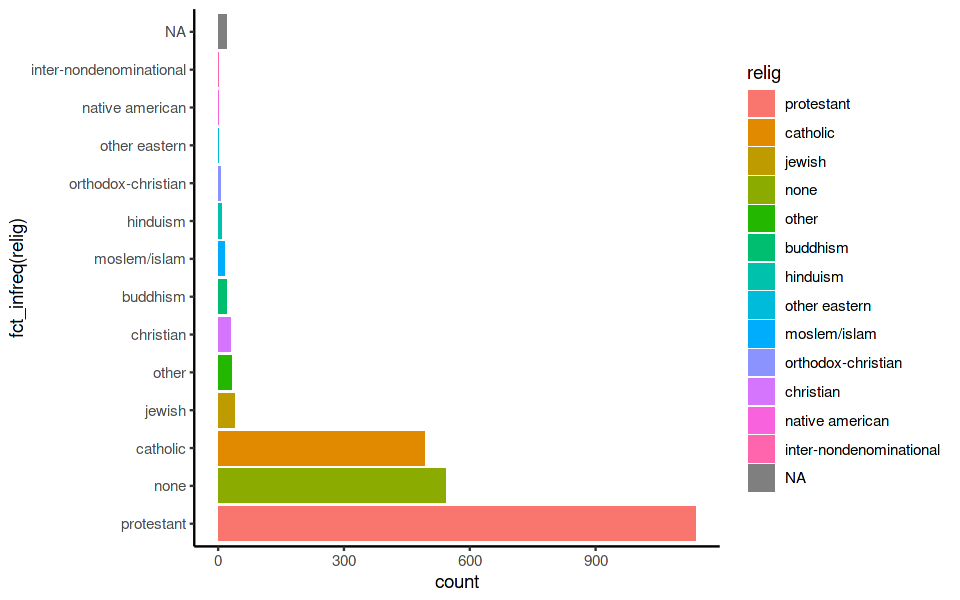

In [ ]:
# plot levels sorted by frequency

We may also want to simplify the plot by grouping some factors together. The `fct_lump` command will combine uncommon factor levels into a new level, "other":

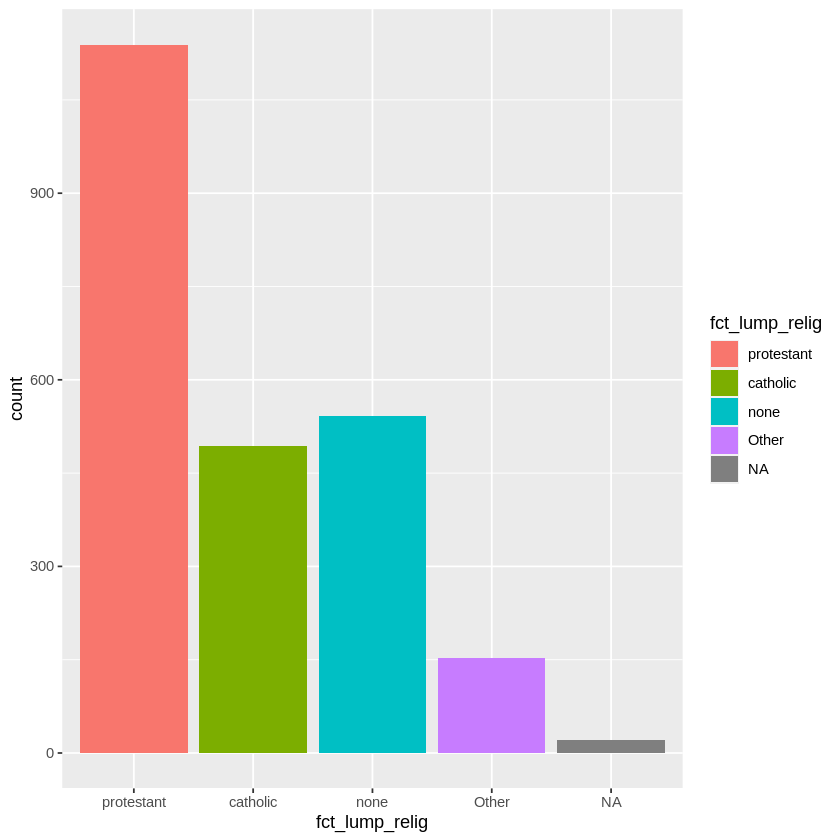

In [40]:
# lump uncommon factors together

gss18 %>% mutate(fct_lump_relig = fct_lump(relig)) %>%
  ggplot(aes(x=fct_lump_relig, fill=fct_lump_relig)) +
  geom_bar()

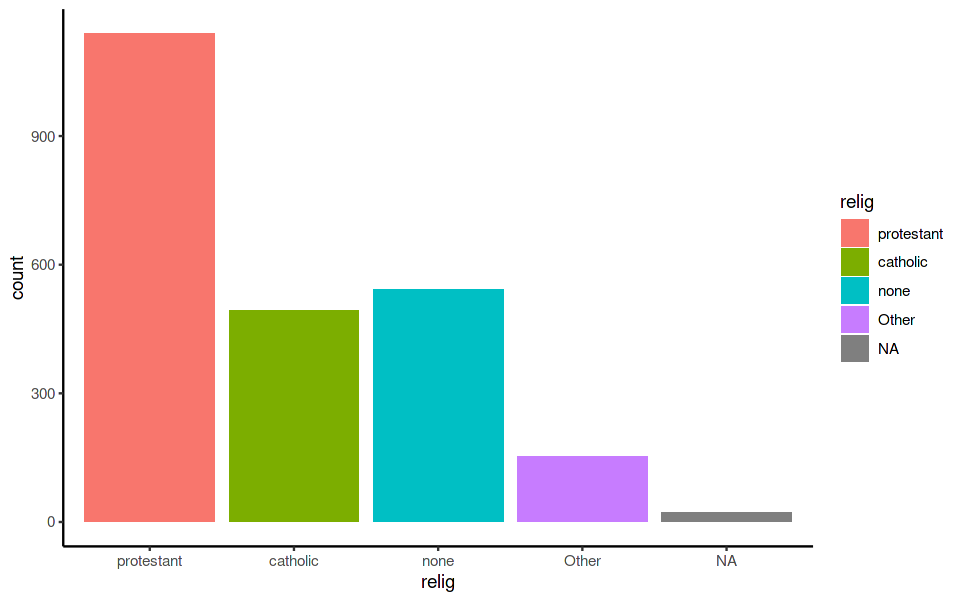

In [ ]:
# religions lumped

Be careful with this. Not everybody enjoys being lumped into the "Other" category. A good compromise in this case could be to use one bar for "Other", but still break everyone out in the legend:

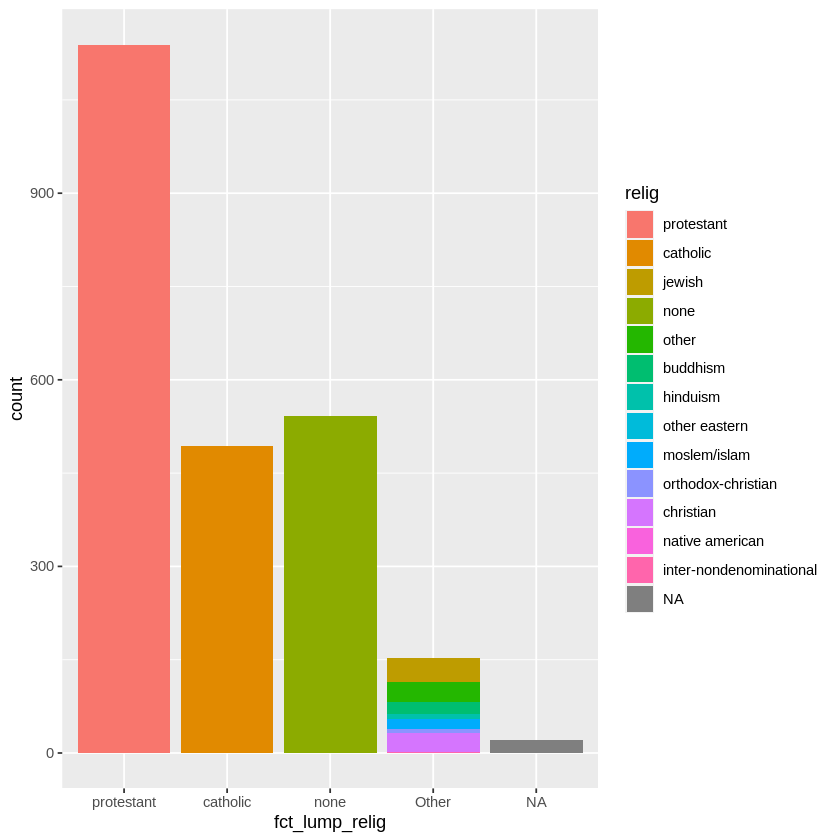

In [6]:
# lumped levels, by still showing the variation
gss18 %>% mutate(fct_lump_relig = fct_lump(relig)) %>%
  ggplot(aes(x=fct_lump_relig, fill=relig)) +
  geom_bar()

## Religious affiliation by generation
How does religious affiliation vary from one generation to the next? To study this, we will first use a simple table. The `table` command will take a dataframe containing two categorical columns and create a 2-way table of counts from them:

In [11]:
gss18 <- gss18 %>% mutate(fct_lump_relig = fct_lump(relig))

In [ ]:
gss18 %>% select(relig)

In [57]:
# religious by generation
gss18 %>% select(generation, fct_lump_relig) %>% table 

            fct_lump_relig
generation   protestant catholic none Other
  silent            162       51   26    11
  boomer            371      159  114    42
  x                 332      155  157    45
  millennial        235      101  221    48
  z                  16       20   21     6

In [46]:
?table

We probably want to normalize this table so that the data are expressed as percentages, with the rows summing to one:

In [12]:
# normalize the table 
gss18 %>% select(generation, fct_lump_relig) %>% table %>% prop.table

            fct_lump_relig
generation    protestant    catholic        none       Other
  silent     0.070649804 0.022241605 0.011338857 0.004797209
  boomer     0.161796773 0.069341474 0.049716529 0.018316616
  x          0.144788487 0.067597034 0.068469254 0.019624945
  millennial 0.102485826 0.044047100 0.096380288 0.020933275
  z          0.006977758 0.008722198 0.009158308 0.002616659

Now let us find the conditional distribution of religion; given a particular value of generation

In [14]:
gss18 %>% select(generation, fct_lump_relig) %>% table %>% prop.table(1)

            fct_lump_relig
generation   protestant   catholic       none      Other
  silent     0.64800000 0.20400000 0.10400000 0.04400000
  boomer     0.54081633 0.23177843 0.16618076 0.06122449
  x          0.48185776 0.22496372 0.22786647 0.06531205
  millennial 0.38842975 0.16694215 0.36528926 0.07933884
  z          0.25396825 0.31746032 0.33333333 0.09523810

Note that by normalizing the rows or columns, we are now studying the *conditional* distribution of race given generational status (or vice versa). This was a point of confusion on the midterm.

Note that the values in every row adds upto to 1. In this we can find religious trend across the generation; e.g., proportion of protestants are decreasing from one generation to another.

Next we will do conditional distribution of generation; given a religion

In [16]:
gss18 %>% select(generation, fct_lump_relig) %>% table %>% prop.table(2)

            fct_lump_relig
generation   protestant   catholic       none      Other
  silent     0.14516129 0.10493827 0.04823748 0.07236842
  boomer     0.33243728 0.32716049 0.21150278 0.27631579
  x          0.29749104 0.31893004 0.29128015 0.29605263
  millennial 0.21057348 0.20781893 0.41001855 0.31578947
  z          0.01433692 0.04115226 0.03896104 0.03947368

In this case, the column values adds upto 1.  With this you can answer quesitons like; 
Amongnst all the protestants, which generation has the highest number of protestants?

Next, let's test whether religious affiliation and generational status are statistically independent. To do this, we'll perform a chi-squared test of independence, using `chisq.test()`:

In [63]:
# chi-squared test of independence
gss18 %>% select(generation, fct_lump_relig) %>% table %>% chisq.test()

Warning message in chisq.test(.):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  .
X-squared = 130.53, df = 12, p-value < 2.2e-16


For now we ignore the error (I got stumped on that yesterday!) and just look at the p-value to conclude that we reject (because of very low p-value) the null hypothesis

More on the error here: https://stats.stackexchange.com/questions/81483/warning-in-r-chi-squared-approximation-may-be-incorrect

## Hours of TV watched
How does TV watching vary from generation to generation?

Warning message:
“Removed 793 rows containing non-finite values (`stat_boxplot()`).”


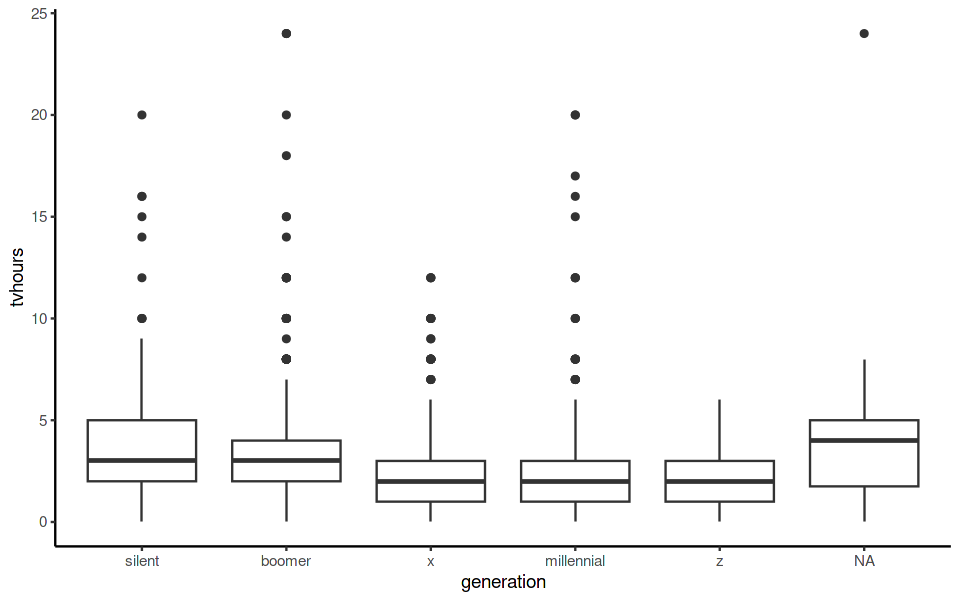

In [ ]:
# hours of TV
gss18 %>% ggplot(aes(x=generation, y=tvhours)) + geom_boxplot()

This plot could maybe be improved by ordering the boxes so that the medians are in ascending order:

Warning message:
“`fct_reorder()` removing 793 missing values.
ℹ Use `.na_rm = TRUE` to silence this message.
ℹ Use `.na_rm = FALSE` to preserve NAs.”
Warning message:
“`fct_reorder()` removing 793 missing values.
ℹ Use `.na_rm = TRUE` to silence this message.
ℹ Use `.na_rm = FALSE` to preserve NAs.”
Warning message:
“Removed 793 rows containing non-finite values (`stat_boxplot()`).”


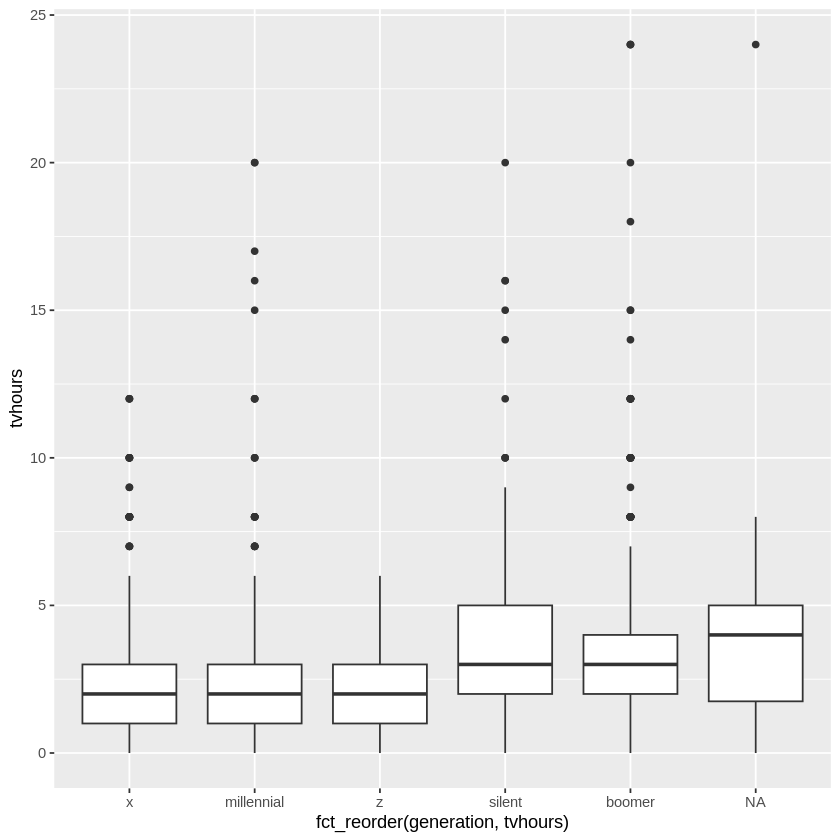

In [65]:
# reorder the factor in ascending order of median
gss18 %>% ggplot(aes(x=fct_reorder(generation, tvhours), y=tvhours)) + geom_boxplot()

Why might this be?

## Phone usage
How many people in each generation use a {land line, cell phone}?

In [66]:
gss18 %>% select(generation, phone) %>% table %>% prop.table(1)

            phone
generation      no phone     refused phone in home phone elsewhere
  silent     0.028000000 0.028000000   0.676000000     0.016000000
  boomer     0.004322767 0.050432277   0.423631124     0.024495677
  x          0.004310345 0.041666667   0.231321839     0.014367816
  millennial 0.003284072 0.016420361   0.090311987     0.003284072
  z          0.000000000 0.047619048   0.174603175     0.031746032
            phone
generation   phone,dk where   cellphone
  silent        0.000000000 0.252000000
  boomer        0.000000000 0.497118156
  x             0.000000000 0.708333333
  millennial    0.000000000 0.886699507
  z             0.000000000 0.746031746

## Political orientation

In [67]:
select(gss18, generation, partyid) %>% table %>% prop.table(1)

            partyid
generation   strong democrat not str democrat ind,near dem independent
  silent          0.21285141       0.10843373   0.14056225  0.12449799
  boomer          0.19202363       0.14327917   0.11225997  0.12703102
  x               0.16204380       0.15474453   0.14160584  0.17518248
  millennial      0.11570248       0.17024793   0.15206612  0.25950413
  z               0.07936508       0.22222222   0.07936508  0.20634921
            partyid
generation   ind,near rep not str republican strong republican other party
  silent       0.09638554         0.10843373        0.18875502  0.02008032
  boomer       0.11078287         0.12407681        0.16100443  0.02954210
  x            0.10656934         0.13430657        0.09635036  0.02919708
  millennial   0.12231405         0.09256198        0.04297521  0.04462810
  z            0.15873016         0.14285714        0.06349206  0.04761905

We can visualize these proportions, but it gets a bit messy because of all the levels.

### Recoding factors
Sometimes we want to recode factors to make their labels more interpretable/plottable/whatever. We can use `fct_recode` to this. The syntax is

    fct_recode(<factor>, "new_level1" = "old level1", "new level2" = "old level2", ...)
    
A useful feature of `fct_recode` is for combining multiple factors into one:

In [68]:
gss18$partyid %>% unique

[1] not str republican ind,near dem       ind,near rep       strong republican 
[5] strong democrat    independent        not str democrat   <NA>              
[9] other party       
8 Levels: strong democrat not str democrat ind,near dem ... other party

In [71]:
# lump everyone into Democrat, Independent, Republican, or Other

gss18 %>%
  mutate(partyid = fct_recode(partyid,
    "Republican, strong"    = "strong republican",
    "Republican, weak"      = "not str republican",
    "Independent, near republican" = "ind,near rep",
    "Independent, near democrat" = "ind,near dem",
    "Democrat, weak"        = "not str democrat",
    "Democrat, strong"      = "strong democrat"
  )) %>% .$partyid %>% unique

[1] Republican, weak             Independent, near democrat  
[3] Independent, near republican Republican, strong          
[5] Democrat, strong             independent                 
[7] Democrat, weak               <NA>                        
[9] other party                 
8 Levels: Democrat, strong Democrat, weak ... other party

In [70]:
gss18$partyid %>% unique

[1] not str republican ind,near dem       ind,near rep       strong republican 
[5] strong democrat    independent        not str democrat   <NA>              
[9] other party       
8 Levels: strong democrat not str democrat ind,near dem ... other party

If there are many levels this gets repetitious, so we have an additional command called `fct_collapse` which is specifically designed to handle this case:

In [ ]:
gss18 %>%
  mutate(partyid = fct_collapse(partyid,
    Other = c("no answer", "don't know", "other party"),
    Republican = c("strong republican", "not str republican"),
    Independent = c("ind,near rep", "independent", "ind,near dem"),
    Democrat = c("not str democrat", "strong democrat")
  )) %>%
  count(partyid)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `partyid = fct_collapse(...)`.
Caused by warning:
! Unknown levels in `f`: no answer, don't know”


partyid,n
<fct>,<int>
Democrat,731
Independent,980
Republican,527
Other,77
NA,33
